<a href="https://colab.research.google.com/github/MCalenda/Q-DELOREAN/blob/main/notebooks/tfidf_nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount Google Drive

In [9]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/SE4AI-Quantum/Q-DELOREAN


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/SE4AI-Quantum/Q-DELOREAN


## Install dependencies

In [10]:
!pip install codecarbon
! codecarbon init

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Welcome to CodeCarbon, here is your experiment id:
7250facd-1f0a-4e09-a0db-87797b13c69c (from ./.codecarbon.config)



## Import Libraries and Frameworks

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [12]:
SEED = 2
DS_RESAMPLED_PATH = 'data/processed/promise-reclass_resampled.csv'
DS_NORMALIZED_PATH = 'data/processed/promise-reclass_normalized.csv'

df = pd.read_csv(DS_NORMALIZED_PATH, index_col=False)

## Split data

In [13]:
from sklearn.model_selection import train_test_split

X_column = 'RequirementText'
y_column = 'Class'

X = df[X_column]
y = df[y_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

## Training

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('naive_bayes', MultinomialNB())
])

from codecarbon import EmissionsTracker
tracker = EmissionsTracker()
tracker.start()
pipeline.fit(X_train, y_train)
tracker.stop()

[codecarbon INFO @ 15:11:29] [setup] RAM Tracking...
[codecarbon INFO @ 15:11:29] [setup] GPU Tracking...
[codecarbon INFO @ 15:11:29] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 15:11:29] [setup] CPU Tracking...
[codecarbon DEBUG @ 15:11:29] Not using PowerGadget, an exception occurred while instantiating IntelPowerGadget : Platform not supported by Intel Power Gadget
[codecarbon DEBUG @ 15:11:29] Not using the RAPL interface, an exception occurred while instantiating IntelRAPL : Intel RAPL files not found at /sys/class/powercap/intel-rapl on linux
[codecarbon WARNING @ 15:11:29] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:11:31] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:11:31] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:11:31] >>> Tracker's metadata:
[codecarbon INFO @ 15:11:31]   Platform system: Linux-5.15.107+

2.577012569462158e-07

## Testing & Results

In [15]:
from sklearn import metrics

y_pred = pipeline.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.8172043010752689
Precision: 0.8181530676786845
Recall: 0.8172043010752689
F1 Score: 0.8168222828956978


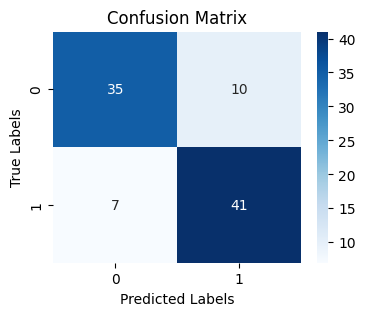

In [16]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()